In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import sklearn
import xgboost as xgb

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
import os



In [89]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


In [52]:
df = pd.read_csv('dataset_telcochurn.csv')

# Dataset Description

| Feature Name	| Description |	
| :---        |    :----:   |  
| customerID |	Contains customer ID |	categorical
| gender |	whether the customer female or male |	categorical
| SeniorCitizen |	Whether the customer is a senior citizen or not (1, 0) |	numeric, int
| Partner |	Whether the customer has a partner or not (Yes, No) |	categorical
| Dependents |	Whether the customer has dependents or not (Yes, No) |	categorical
| tenure |	Number of months the customer has stayed with the company |	numeric, int
| PhoneService |	Whether the customer has a phone service or not (Yes, No) |	categorical
| MultipleLines |	Whether the customer has multiple lines r not (Yes, No, No phone service) |	categorical
| InternetService |	Customer’s internet service provider (DSL, Fiber optic, No) |	categorical
| OnlineSecurity |	Whether the customer has online security or not (Yes, No, No internet service) |	categorical
| OnlineBackup |	Whether the customer has online backup or not (Yes, No, No internet service) |	categorical
| DeviceProtection |	Whether the customer has device protection or not (Yes, No, No internet service) |	categorical
| TechSupport |	Whether the customer has tech support or not (Yes, No, No internet service) |	categorical
| streamingTV |	Whether the customer has streaming TV or not (Yes, No, No internet service) |	categorical
| streamingMovies |	Whether the customer has streaming movies or not (Yes, No, No internet service) |	categorical
| Contract |	The contract term of the customer (Month-to-month, One year, Two year) |	categorical
| PaperlessBilling |	Whether the customer has paperless billing or not (Yes, No) |	categorical
| PaymentMethod |	The customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card) |	categorical
| MonthlyCharges |	The amount charged to the customer monthly |	numeric , int
| TotalCharges |	The total amount charged to the customer |	object
| Churn |	Whether the customer churned or not (Yes or No) |	categorical

# Data Exploration

In [53]:
print('Dataset shape: ',df.shape)
df

Dataset shape:  (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [54]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [56]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')  #converting series object dataset into numeric

df.TotalCharges.dtypes

dtype('float64')

In [57]:
missing_data = df.isnull().sum(axis=0)  #checking missing value
missing_data = missing_data[missing_data > 0]
missing_data

TotalCharges    11
dtype: int64

In [58]:
df['TotalCharges']=df['TotalCharges'].fillna(0)

Visualize dataset

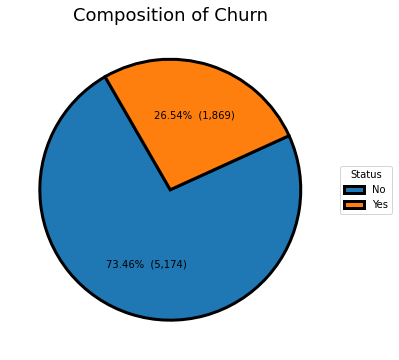

In [65]:
value_count=df.Churn.value_counts()

fig,ax=plt.subplots(figsize=(10, 6),subplot_kw=dict(aspect="equal"))
recipe = ["Churn","not Churn"]
plt.title('Composition of Churn',fontsize=18)

data=[value_count[0],value_count[1]]

plt.pie(data,explode = (0,0),
        textprops=dict(size= 10, color= "black"),
        autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(data)/100),startangle = 120,wedgeprops=dict( edgecolor = "black", linewidth = 3))


labels='No','Yes'
plt.legend(labels,title='Status',loc='center',bbox_to_anchor=(1,0,0.2,1))

In [66]:
df=pd.get_dummies(df,columns=['Churn'],drop_first=True) #one hot encoding for Churn column

In [67]:
df['Churn_Yes'].value_counts()

0    5174
1    1869
Name: Churn_Yes, dtype: int64

In [68]:
def stack_plot(data, xtick, col2='Churn_Yes', col3='total'):  #define for ditribution data
 ind = np.arange(data.shape[0])

 if len(data[xtick].unique())<5:
    plt.figure(figsize=(5,5))
 elif len(data[xtick].unique())>=5 & len(data[xtick].unique())<10:
    plt.figure(figsize=(7,7))
 else:
    plt.figure(figsize=(10,10))
    
 p1 = plt.bar(ind, data[col3].values)
 p2 = plt.bar(ind, data[col2].values)
 
 plt.ylabel('Count')

 plt.xticks(ticks=ind, rotation=90,labels= list(data[xtick].values))
 plt.legend((p1[0], p2[0]), ('Not Churn','Yes'))
 
 plt.show()

def barplots(data, col1, col2='Churn_Yes', top=False):
    temp = pd.DataFrame(df.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    temp['total'] = pd.DataFrame(df.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(df.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']

    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp)

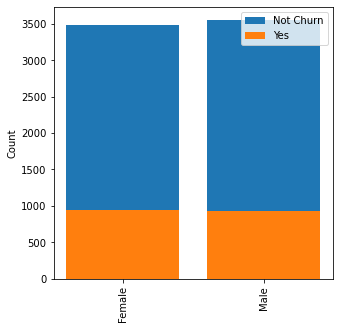

   gender  Churn_Yes  total       Avg
0  Female        939   3488  0.269209
1    Male        930   3555  0.261603


In [69]:
barplots(data,'gender','Churn_Yes')

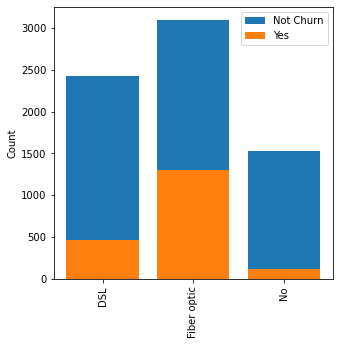

  InternetService  Churn_Yes  total       Avg
0             DSL        459   2421  0.189591
1     Fiber optic       1297   3096  0.418928
2              No        113   1526  0.074050


In [70]:
barplots(data,'InternetService','Churn_Yes')

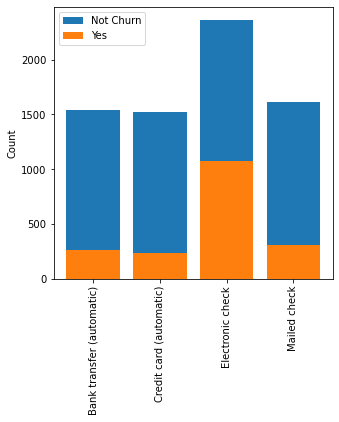

               PaymentMethod  Churn_Yes  total       Avg
0  Bank transfer (automatic)        258   1544  0.167098
1    Credit card (automatic)        232   1522  0.152431
2           Electronic check       1071   2365  0.452854
3               Mailed check        308   1612  0.191067


In [71]:
barplots(data,'PaymentMethod','Churn_Yes')

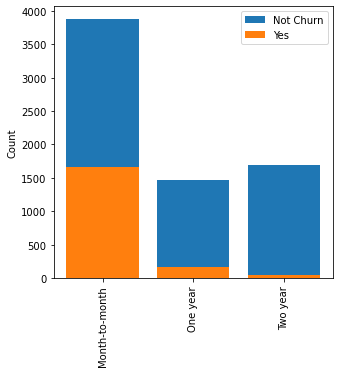

         Contract  Churn_Yes  total       Avg
0  Month-to-month       1655   3875  0.427097
1        One year        166   1473  0.112695
2        Two year         48   1695  0.028319


In [72]:
barplots(data,'Contract','Churn_Yes')

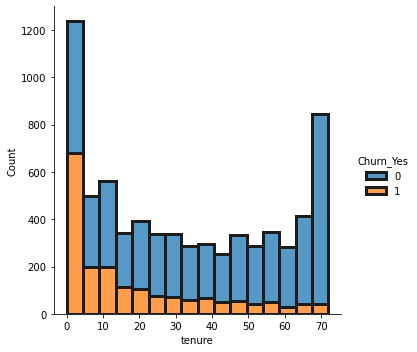

In [73]:
sns.displot(df,x='tenure',hue='Churn_Yes',edgecolor = "#1c1c1c", linewidth = 3,stat='count',multiple='stack')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

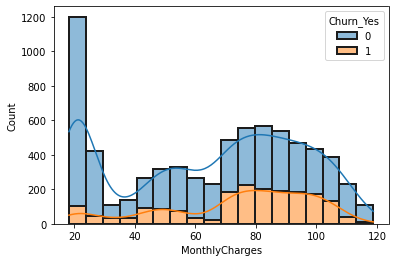

In [74]:

sns.histplot(df,x='MonthlyCharges',hue='Churn_Yes',kde=True,multiple='stack',element='bars',bins='auto',edgecolor = "#1c1c1c", linewidth = 2)

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

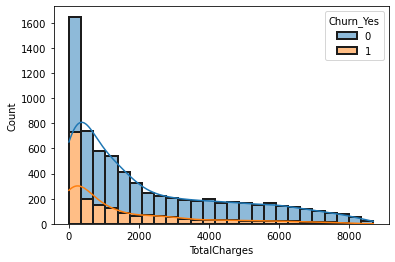

In [75]:
sns.histplot(df,x='TotalCharges', hue='Churn_Yes',kde=True,multiple='stack',element='bars',bins='auto',edgecolor = "#1c1c1c", linewidth = 2)

# Data Preparation

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [77]:
df=df.drop(['customerID'],axis=1)

In [78]:
missing_data = df.isnull().sum(axis=0).reset_index() 
missing_data.columns=['variable','missing values']
missing_data.sort_values('missing values',ascending=False).reset_index(drop = True)

,variable,missing values
0,gender,0
1,SeniorCitizen,0
2,TotalCharges,0
3,MonthlyCharges,0
4,PaymentMethod,0
5,PaperlessBilling,0
6,Contract,0
7,StreamingMovies,0
8,StreamingTV,0
9,TechSupport,0


In [80]:
catcol = [col for col in df.columns if df[col].dtype == "object"] #encoding data
le = LabelEncoder()
label_mapping = {}
for col in catcol:
        df[col] = le.fit_transform(df[col])
        label_mapping[col] = dict(zip(le.classes_,le.transform(le.classes_)))\
        
label_mapping

{'gender': {'Female': 0, 'Male': 1},
 'Partner': {'No': 0, 'Yes': 1},
 'Dependents': {'No': 0, 'Yes': 1},
 'PhoneService': {'No': 0, 'Yes': 1},
 'MultipleLines': {'No': 0, 'No phone service': 1, 'Yes': 2},
 'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2},
 'OnlineSecurity': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'OnlineBackup': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'DeviceProtection': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'TechSupport': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'StreamingTV': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'StreamingMovies': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
 'PaperlessBilling': {'No': 0, 'Yes': 1},
 'PaymentMethod': {'Bank transfer (automatic)': 0,
  'Credit card (automatic)': 1,
  'Electronic check': 2,
  'Mailed check': 3}}

In [81]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Yes
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Correlation

In [82]:
df2=df.corr().Churn_Yes.sort_values(ascending=False).reset_index()
df2

,index,Churn_Yes
0,Churn_Yes,1.000000
1,MonthlyCharges,0.193356
2,PaperlessBilling,0.191825
3,SeniorCitizen,0.150889
4,PaymentMethod,0.107062
5,MultipleLines,0.038037
6,PhoneService,0.011942
7,gender,-0.008612
8,StreamingTV,-0.036581
9,StreamingMovies,-0.038492


Split

In [84]:
X=df.drop(['Churn_Yes'],1)
y=df[['Churn_Yes']].values.reshape(-1,1)

Balancing

In [102]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=1)
X_over, y_over = oversample.fit_resample(X, y)

In [103]:
train_X,test_X,train_y,test_y = train_test_split(X_over,y_over,test_size=0.2,random_state=0)

In [104]:
test_X.shape,test_y.shape

((2070, 19), (2070,))

# Machine Learning Modelling

Decision Tree

In [105]:
dtr=DecisionTreeClassifier()
dtr.fit(train_X,train_y)
crosval_dtr=cross_val_score(dtr,X_over,y_over,cv=5)
print('Score: ',crosval_dtr.mean())

Score:  0.8814288682950293


<AxesSubplot:>

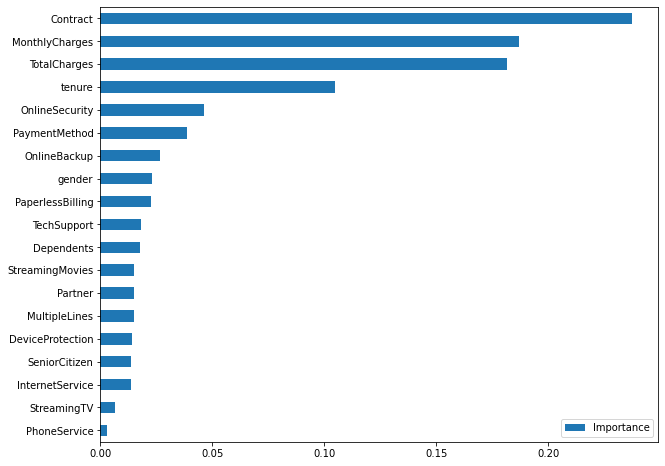

In [106]:
feat_importances = pd.DataFrame(dtr.feature_importances_, index=test_X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=True, inplace=True)
feat_importances.plot(kind='barh',figsize=(10,8))


In [107]:
dtr_pred=dtr.predict(test_X)
dtr_conf=confusion_matrix(test_y,dtr_pred)
dtr_report=classification_report(test_y,dtr_pred)
dtr_acc=round(accuracy_score(test_y,dtr_pred)*100,ndigits=3)
dtr_rocauc=roc_auc_score(test_y, dtr_pred)
print(f"Confusion Matrix : \n\n{dtr_conf}")
print(f"\nClassification Report : \n\n{dtr_report}")
print(f"\nThe Accuracy of Decision Tree is {dtr_acc} %")
print(f'ROC AUC Score with Decision Tree: {dtr_rocauc}')

Confusion Matrix : 

[[797 236]
 [ 55 982]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      1033
           1       0.81      0.95      0.87      1037

    accuracy                           0.86      2070
   macro avg       0.87      0.86      0.86      2070
weighted avg       0.87      0.86      0.86      2070


The Accuracy of Decision Tree is 85.942 %
ROC AUC Score with Decision Tree: 0.8592507988547647


Random forest

In [109]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42) 
rfc.fit(train_X,train_y)
crosval_rfc=cross_val_score(rfc,X_over,y_over,cv=5)
print('Score: ',crosval_rfc.mean())


Score:  0.9024963400368448


In [110]:
rfc_pred = rfc.predict(test_X)
rfc_conf = confusion_matrix(test_y, rfc_pred)
rfc_report = classification_report(test_y, rfc_pred)
rfc_acc = round(accuracy_score(test_y, rfc_pred)*100, ndigits = 2)
rfc_rocauc=roc_auc_score(test_y, rfc_pred)
print(f"Confusion Matrix : \n\n{rfc_conf}")
print(f"\nClassification Report : \n\n{rfc_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfc_acc} %")
print(f'ROC AUC score wiht Random Forest Classifier: {rfc_rocauc}')

Confusion Matrix : 

[[853 180]
 [ 48 989]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.95      0.83      0.88      1033
           1       0.85      0.95      0.90      1037

    accuracy                           0.89      2070
   macro avg       0.90      0.89      0.89      2070
weighted avg       0.90      0.89      0.89      2070


The Accuracy of Random Forest Classifier is 88.99 %
ROC AUC score wiht Random Forest Classifier: 0.8897314373037869


Logistic Regresion

In [111]:
lr=LogisticRegression()
lr.fit(train_X,train_y)
crosval=cross_val_score(lr,X_over,y_over,cv=5)
print('Score: ',crosval.mean())

Score:  0.7626598767637287


In [112]:
lr_pred = lr.predict(test_X)
lr_conf = confusion_matrix(test_y, lr_pred)
lr_report = classification_report(test_y, lr_pred)
lr_acc = round(accuracy_score(test_y, lr_pred)*100, ndigits = 2)
lr_rocauc=roc_auc_score(test_y, lr_pred)
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regresion is {lr_acc} %")
print(f'ROC AUC score wiht Logistic Regresion: {lr_rocauc}')



Confusion Matrix : 

[[752 281]
 [207 830]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.78      0.73      0.76      1033
           1       0.75      0.80      0.77      1037

    accuracy                           0.76      2070
   macro avg       0.77      0.76      0.76      2070
weighted avg       0.77      0.76      0.76      2070


The Accuracy of Logistic Regresion is 76.43 %
ROC AUC score wiht Logistic Regresion: 0.7641812473803259


Gradien Boost

In [113]:
gradien=GradientBoostingClassifier()

gradien.fit(train_X,train_y)
crosval=cross_val_score(gradien,X_over,y_over,cv=5)
print('Score: ',crosval.mean())

Score:  0.781021894401599


In [114]:
gradien_pred=gradien.predict(test_X)
gradien_conf=confusion_matrix(test_y,gradien_pred)
gradien_report=classification_report(test_y,gradien_pred)
gradien_acc=round(accuracy_score(test_y,gradien_pred)*100,ndigits=3)
gradien_rocauc=roc_auc_score(test_y, gradien_pred)
print(f"Confusion Matrix : \n\n{gradien_conf}")
print(f"\nClassification Report : \n\n{gradien_report}")
print(f"\nThe Accuracy of Gradien Boost is {gradien_acc} %")
print(f'ROC AUC score wiht Gradien Boost: {gradien_rocauc}')

Confusion Matrix : 

[[753 280]
 [173 864]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1033
           1       0.76      0.83      0.79      1037

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070


The Accuracy of Gradien Boost is 78.116 %
ROC AUC score wiht Gradien Boost: 0.7810587171087945


SGD Classifier

In [115]:
sgd=SGDClassifier()

sgd.fit(train_X,train_y)
crosval=cross_val_score(sgd,X_over,y_over,cv=5)
print('Score: ',crosval.mean())

Score:  0.6988793858266613


In [116]:
sgd_pred=sgd.predict(test_X)
sgd_conf=confusion_matrix(test_y,sgd_pred)
sgd_report=classification_report(test_y,sgd_pred)
sgd_acc=round(accuracy_score(test_y,sgd_pred)*100,ndigits=3)
sgd_rocauc=roc_auc_score(test_y, sgd_pred)
print(f"Confusion Matrix : \n\n{sgd_conf}")
print(f"\nClassification Report : \n\n{sgd_report}")
print(f"\nThe Accuracy of SGD is {sgd_acc} %")
print(f'ROC AUC Score with SGD: {sgd_rocauc}')

Confusion Matrix : 

[[924 109]
 [616 421]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.60      0.89      0.72      1033
           1       0.79      0.41      0.54      1037

    accuracy                           0.65      2070
   macro avg       0.70      0.65      0.63      2070
weighted avg       0.70      0.65      0.63      2070


The Accuracy of SGD is 64.976 %
ROC AUC Score with SGD: 0.6502304379768508


GauusianNB

In [117]:
gnb=GaussianNB()

gnb.fit(train_X,train_y)
crosval=cross_val_score(gnb,X_over,y_over,cv=5)
print('Score: ',crosval.mean())


Score:  0.7512559219021069


In [118]:
gnb_pred=gnb.predict(test_X)
gnb_conf=confusion_matrix(test_y,gnb_pred)
gnb_report=classification_report(test_y,gnb_pred)
gnb_acc=round(accuracy_score(test_y,gnb_pred)*100,ndigits=3)
gnb_rocauc=roc_auc_score(test_y, gnb_pred)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian is {gnb_acc} %")
print(f'ROC AUC Score with Gaussian Naive Bayes: {gnb_rocauc}',)

Confusion Matrix : 

[[730 303]
 [206 831]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1033
           1       0.73      0.80      0.77      1037

    accuracy                           0.75      2070
   macro avg       0.76      0.75      0.75      2070
weighted avg       0.76      0.75      0.75      2070


The Accuracy of Gaussian is 75.411 %
ROC AUC Score with Gaussian Naive Bayes: 0.7540148111360775


XGBoost

In [119]:
xgboost=XGBClassifier(objective='binary:logistic',eval_metric = 'auc', n_jobs=-1)
xgboost.fit(train_X,train_y)
crosval=cross_val_score(xgboost,X_over,y_over,cv=5)
print('Score: ',crosval.mean())

Score:  0.859685721824121


In [120]:
xgboost_pred=xgboost.predict(test_X)
xgboost_conf=confusion_matrix(test_y,xgboost_pred)
xgboost_report=classification_report(test_y,xgboost_pred)
xgboost_acc=round(accuracy_score(test_y,xgboost_pred)*100,ndigits=3)
xgboost_rocauc=roc_auc_score(test_y, xgboost_pred)
print(f"Confusion Matrix : \n\n{xgboost_conf}")
print(f"\nClassification Report : \n\n{xgboost_report}")
print(f"\nThe Accuracy of XGB is {xgboost_acc} %")
print(f'ROC AUC Score with XGBOOST: {xgboost_rocauc}')


Confusion Matrix : 

[[808 225]
 [ 72 965]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1033
           1       0.81      0.93      0.87      1037

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070


The Accuracy of XGB is 85.652 %
ROC AUC Score with XGBOOST: 0.8563783757039864


In [121]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(train_X,train_y)
crosval=cross_val_score(knn,X_over,y_over,cv=5)
print('Score: ',crosval.mean())

Score:  0.7602450715998532


In [122]:
knn_pred=knn.predict(test_X)
knn_conf=confusion_matrix(test_y,knn_pred)
knn_report=classification_report(test_y,knn_pred)
knn_acc=round(accuracy_score(test_y,knn_pred)*100,ndigits=3)
knn_rocauc=roc_auc_score(test_y, knn_pred)
print(f"Confusion Matrix : \n\n{knn_conf}")
print(f"\nClassification Report : \n\n{knn_report}")
print(f"\nThe Accuracy of KNN is {knn_acc} %")
print(f'ROC AUC Score with KNN: {knn_rocauc}')


Confusion Matrix : 

[[709 324]
 [168 869]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.81      0.69      0.74      1033
           1       0.73      0.84      0.78      1037

    accuracy                           0.76      2070
   macro avg       0.77      0.76      0.76      2070
weighted avg       0.77      0.76      0.76      2070


The Accuracy of KNN is 76.232 %
ROC AUC Score with KNN: 0.7621723248517347


In [126]:
results = pd.DataFrame([["XGBoost Classifier", xgboost_acc, xgboost_rocauc],
                        ["Decision Tree Classifier", dtr_acc, dtr_rocauc], 
                        ["Gaussian naive bayes classifier", gnb_acc, gnb_rocauc],
                        ["Gradien Boost Classifier", gradien_acc, gradien_rocauc],
                        ["Random Forest Classifier", rfc_acc, rfc_rocauc],
                        ["Logistic Regression",lr_acc,lr_rocauc],
                        ["KNeighborsClassifier",knn_acc,knn_rocauc],
                        ["Support Vector Machine",SVM_acc,SVM_rocauc]],
                        columns = ["Models", "Testing Accuracy Score", "ROC AUC Score"])

results.sort_values(by=['Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='YlOrRd')

,Models,Testing Accuracy Score,ROC AUC Score
4,Random Forest Classifier,88.990000,0.889731
1,Decision Tree Classifier,85.942000,0.859251
0,XGBoost Classifier,85.652000,0.856378
3,Gradien Boost Classifier,78.116000,0.781059
5,Logistic Regression,76.430000,0.764181
6,KNeighborsClassifier,76.232000,0.762172
2,Gaussian naive bayes classifier,75.411000,0.754015
7,Support Vector Machine,65.362000,0.653714
